# Construyendo un sistema de análisis de sentimiento


## Sesion 1

### Enunciado
Se le pide que tome del corpus con el que vamos a trabajar en la práctica, HateEval (en castellano), los 10 primero tweets.

1. Haga un pequeño preproceso (todo el texto en minúsculas, sin signos de puntuación ni palabras vacias y reduzca a la raiz).

2. Obtenga las 15 palabras más frecuentes y muéstrelas en un gráfico de frecuencia

## Implementación

### Paso 1: Descargando las librerías de nltk

Importamos la librería nltk. Si no la tenemos instalada la podemos instalar mediante pip

    pip install nltk
 
Una vez importada, descargamos los paquetes necesarios: en este caso, con los conjuntos "popular" y "spanish grammars" será suficiente. El "popular" descargará los paquetes mas populares, mientras que "spanish grammars" descargará los paquetes para realizar el procesamiento de texto en español

In [1]:
import nltk


nltk.download('popular')
nltk.download('spanish_grammars')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /home/almu/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /home/almu/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /home/almu/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /home/almu/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /home/almu/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /home/almu/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk

True

### Paso 2: Cargando el corpus

Cargamos el corpus de entrenamiento desde el fichero "train_es.tsv". Este fichero utiliza un formato csv separado por tabulaciones.
Para este ejercicio, cargamos las 50 primeras filas, correspondientes a 50 tuits.

Para ello utilizaremos la librería pandas, con el método `read_csv()`, indicando en sus parámetros el tipo de separador y el número de filas a leer. Esto nos cargará las 10 filas en un dataframe (al que llamaremos `corpus_df`) con las mismas columnas que en el fichero original, etiquetadas por sus respectivos nombres. 

Una vez cargado, mostraremos el dataframe para comprobar que se ha cargado correctamente

#### Modificación de la sesión 4

Para la sesión 4, cargaremos el corpus completo. Además, cargaremos también el corpus de evaluación "trial_es.tsv". Para poder realizar la clasificación, en el corpus de entrenamiento `corpus_df_train` cargaremos todas las columnas menos el ID, mientras que en el de evaluación `corpus_df_test` cargaremos únicamente el texto.

Además, para cada corpus generaremos un conjunto de etiquetas, cargando del fichero únicamente las columnas correspondientes a las mismas. Para entrenamiento generamos el conjunto `labels_train`, mientras que para evaluación generamos el conjunto `labels_eval`

In [2]:
import pandas as pd

corpus_df_train = pd.read_csv("HateEval/train_es.tsv", sep="\t", usecols =["text","HS", "TR", "AG"])
labels_train = corpus_df_train[['HS', 'TR', 'AG']]
print(labels_train)


corpus_df_eval = pd.read_csv("HateEval/trial_es.tsv", sep="\t", usecols =["text"])
labels_eval = pd.read_csv("HateEval/trial_es.tsv", delimiter='\t', usecols=["HS", "TR", "AG"])

print(corpus_df_train)
print(corpus_df_eval)

      HS  TR  AG
0      1   0   0
1      1   0   0
2      0   0   0
3      0   0   0
4      0   0   0
...   ..  ..  ..
4464   1   1   1
4465   1   0   1
4466   0   0   0
4467   1   0   0
4468   0   0   0

[4469 rows x 3 columns]
                                                   text  HS  TR  AG
0     Easyjet quiere duplicar el número de mujeres p...   1   0   0
1     El gobierno debe crear un control estricto de ...   1   0   0
2     Yo veo a mujeres destruidas por acoso laboral ...   0   0   0
3     — Yo soy respetuoso con los demás, sólamente l...   0   0   0
4     Antonio Caballero y como ser de mal gusto e ig...   0   0   0
...                                                 ...  ..  ..  ..
4464  @miriaan_ac @Linaveso_2105 @HumildesSquad_ CÁL...   1   1   1
4465  @IvanDuque presidente en Cúcuta , tenemos prob...   1   0   1
4466              - Callaté Visto Que Te Dejo En Puta🎤🎶   0   0   0
4467  -¿porque los hombres se casan con las mujeres?...   1   0   0
4468  — No hay nada más

### Paso 3: Preprocesando el texto
#### 3.1. Pasando el texto a minúsculas

Empezamos el preprocesamiento del texto. Para no romper el esquema de datos, el preprocesamiento lo realizaremos sobre la misma estructura del dataframe, aprovechando la columna ya existente.

Para pasar el texto a minúsculas, utilizamos la función `lower()` de la librería estándar.
Lo aplicamos sobre cada fila de la columna 'text', en la que se almacena el texto. 

Para ello, utilizamos la función `apply()` de pandas, pasando la función en forma de lambda. Esto aplicará dicha función sobre cada fila del dataframe. 
La función `apply()` nos devuelve una copia del dataframe con las modificaciones realizadas. Almacenamos el resultado en un nuevo dataframe llamado `corpus_lower`

Finalmente, mostramos el dataframe para comprobar que el proceso ha funcionado correctamente

#### Modificación de la sesión 4

Para la sesión 4, repetimos el proceso con el conjunto de evaluación. De esta forma, el conjunto reducido a minúsculas de entrenamiento será `corpus_lower_train` y el de evaluación `corpus_lower_eval`. 

In [3]:
corpus_lower_train = corpus_df_train
corpus_lower_train['text'] = corpus_df_train['text'].apply(lambda text: text.lower())

corpus_lower_eval = corpus_df_eval
corpus_lower_eval['text'] = corpus_df_eval['text'].apply(lambda text: text.lower())

print(corpus_lower_train)
print(corpus_lower_eval)

                                                   text  HS  TR  AG
0     easyjet quiere duplicar el número de mujeres p...   1   0   0
1     el gobierno debe crear un control estricto de ...   1   0   0
2     yo veo a mujeres destruidas por acoso laboral ...   0   0   0
3     — yo soy respetuoso con los demás, sólamente l...   0   0   0
4     antonio caballero y como ser de mal gusto e ig...   0   0   0
...                                                 ...  ..  ..  ..
4464  @miriaan_ac @linaveso_2105 @humildessquad_ cál...   1   1   1
4465  @ivanduque presidente en cúcuta , tenemos prob...   1   0   1
4466              - callaté visto que te dejo en puta🎤🎶   0   0   0
4467  -¿porque los hombres se casan con las mujeres?...   1   0   0
4468  — no hay nada más lento que un caracol. — cáll...   0   0   0

[4469 rows x 4 columns]
                                                 text
0   @ian_delacalva @irantzuvarela @pikaramagazine ...
1   ninguna mujer es 'puta' ❗❗❗ https://t.co/cv0cq.

#### 3.2. Eliminando signos de puntuación, stopwords, y otra información irrelevante

Una vez con todo el texto en minúsculas, realizamos otro preprocesamiento para eliminar signos de puntuación y stopwords. Además de esto, por eliminar incoherencias, en nuestro caso también eliminaremos las citas a otros usuarios y las URL mencionadas.

Para estas operaciones utilizaremos las librerías nltk y re.

Empezaremos cargando el diccionario de stopwords del español, a través de la clase stopwords de nltk.

- Función `token_filter()`

    Para poder eliminar la información irrelevante de cada frase, nos creamos una función. Esta recibirá una cadena de caracteres (correspondiente al campo 'text' de una de las filas del dataframe), eliminará la información irrelevante, y devolverá una lista con los tokens filtrados.
    
    Para eliminar las URL, usuarios, y signos de puntuación; utilizaremos expresiones regulares, a través de la librería re. Las URL se describirán como subcadenas empezadas por https y terminadas por espacio o por final de cadena. Los usuarios se describirán como subcadenas empezadas por @, y terminadas por espacio o final de cadena. Y los signos de puntuación los describiremos como símbolos que no sean caracteres alfanuméricos o espacios.
    
    Una vez eliminada esta información, aplicaremos la función `word_tokenize()` sobre la cadena resultante, lo cual nos dividirá la cadena de caracteres en una lista de tokens.
    
    Para eliminar las stopwords, utilizaremos una lista en compresión que recorrerá la lista de tokens, comparándolos con la lista de stopwords de nltk, previamente cargada para el idioma español.

Finalmente, aplicamos la función anterior sobre cada fila del campo 'text' del dataframe, utilizando la función `apply()` desde pandas, y almacenamos el resultado en un nuevo dataframe llamado `corpus_filtered`

#### Modificación de la sesión 4

De nuevo, repetimos el proceso con el conjunto de evaluación. El conjunto de entrenamiento resultante pasará a llamarse `corpus_filtered_train` y el de evaluación `corpus_filtered_eval`


In [4]:
import re
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopwords.words('spanish')

def token_filter(wordlist: pd.DataFrame):
    
    words_no_links = re.sub(r'http.*\s*', '', wordlist)
    words_no_users = re.sub(r'@\w*\s*', '', words_no_links)
    words_no_punct = re.sub(r'[^\w\s]', '', words_no_users)
    
    token_list = word_tokenize(words_no_punct,"spanish")
    
    words_no_stop = [word for word in token_list if word not in stopwords.words('spanish')]
    return words_no_stop
    
    
corpus_filtered_train = corpus_lower_train.copy()
corpus_filtered_train['text'] = corpus_lower_train['text'].apply(token_filter)

corpus_filtered_eval = corpus_lower_eval.copy()
corpus_filtered_eval['text'] = corpus_lower_eval['text'].apply(token_filter)

print(corpus_filtered_train)
print(corpus_filtered_eval)

                                                   text  HS  TR  AG
0     [easyjet, quiere, duplicar, número, mujeres, p...   1   0   0
1     [gobierno, debe, crear, control, estricto, inm...   1   0   0
2     [veo, mujeres, destruidas, acoso, laboral, cal...   0   0   0
3     [respetuoso, demás, sólamente, recuerdo, si, e...   0   0   0
4     [antonio, caballero, ser, mal, gusto, ignorant...   0   0   0
...                                                 ...  ..  ..  ..
4464  [cállateeee, zorra, ahre, cnco, bestboyband, i...   1   1   1
4465  [presidente, cúcuta, problemas, venezolanos, d...   1   0   1
4466                       [callaté, visto, dejo, puta]   0   0   0
4467  [hombres, casan, mujeres, cabras, saben, frega...   1   0   0
4468  [lento, caracol, cállate, hijo, puta, dices, b...   0   0   0

[4469 rows x 4 columns]
                                                 text
0                        [oye, molestas, puta, madre]
1                              [ninguna, mujer, put

#### 3.3. Reduciendo las palabras a su raíz

Una vez generados los tokens, y filtradas únicamente las palabras relevantes, aplicamos una reducción a la raíz para eliminar las derivaciones de cada palabra. Esto nos permitirá realizar una comparación mas precisa, agrupando todas las palabras con la misma raíz.

Para aplicar la reducción, utilizaremos la clase SnowballStemmer de nltk. Para aplicarlo sobre cada fila del dataframe, utilizaremos la misma estrategia que en los pasos anteriores, creando una función que procese la lista de palabras, y aplicándola sobre el dataframe a través de `apply()`

La función reducirá cada palabra, utilizando una lista por compresión conectada a la función `stem()` de SnowballStemmer de nltk. Tras el procesamiento, devolverá la lista de palabras ya reducidas

Aplicamos la función sobre el campo 'text' del dataframe, para aplicarse sobre cada fila del dataframe. El resultado lo almacenamos en un nuevo dataframe llamado `corpus_root`.

#### Modificación de la sesión 4

De nuevo, repetiremos el proceso para el conjunto de evaluación. El conjunto reducido de entrenamiento pasará a llamarse `corpus_root_train` y el de evaluación `corpus_root_eval`


In [5]:
from nltk.stem import SnowballStemmer

sp_stemmer = SnowballStemmer('spanish')

def root_reducer(wordlist):
    root_wordlist = [sp_stemmer.stem(word) for word in wordlist]
    
    return root_wordlist

corpus_root_train = corpus_filtered_train.copy()
corpus_root_train['text'] = corpus_filtered_train['text'].apply(root_reducer)

corpus_root_eval = corpus_filtered_eval.copy()
corpus_root_eval['text'] = corpus_filtered_eval['text'].apply(root_reducer)


print(corpus_root_train)
print(corpus_root_eval)

                                                   text  HS  TR  AG
0     [easyjet, quier, duplic, numer, mujer, pilot, ...   1   0   0
1     [gobiern, deb, cre, control, estrict, inmigr, ...   1   0   0
2     [veo, mujer, destru, acos, laboral, callejer, ...   0   0   0
3     [respetu, demas, sol, recuerd, si, escori, cul...   0   0   0
4     [antoni, caballer, ser, mal, gust, ignor, vez,...   0   0   0
...                                                 ...  ..  ..  ..
4464  [callateee, zorr, ahre, cnco, bestboyband, ihe...   1   1   1
4465  [president, cucut, problem, venezolan, disput,...   1   0   1
4466                           [callat, vist, dej, put]   0   0   0
4467         [hombr, cas, mujer, cabr, sab, freg, plat]   1   0   0
4468  [lent, caracol, callat, hij, put, dic, blackbe...   0   0   0

[4469 rows x 4 columns]
                                                 text
0                            [oye, molest, put, madr]
1                                  [ningun, muj, pu

### Paso 4: Realizando un conteo de palabras

#### 4.1. Uniendo todos los textos en una lista de palabras

En este último paso, queremos realizar un conteo de todas las palabras del conjunto, para encontrar las mas frecuentes.

Actualmente, las palabras se encuentran en los campos 'text' de cada tuit, por lo que es necesario unir el contenido de todos esos campos en una única lista.

Para facilitar este proceso, vamos a recurrir a NumPy, convirtiendo el campo 'text' del dataframe en una simple matriz de listas de palabras. Esto nos permitirá iterar sobre la misma posición a posición, e ir insertando los términos de cada fila en una nueva lista.

Para la conversión, utilizamos el método `to_numpy()` de pandas, que nos devuelve una lista con los contenidos de cada campo 'text' del dataframe. Una vez obtenidos, creamos una lista vacía, y utilizaremos un bucle que irá concatenando cada lista obtenida de cada fila de la matriz, a la lista actual. Para realizar la concatenación, utilizaremos el método `extend()`.

#### Modificación de la sesión 4

Repetimos el proceso para el conjunto de evaluación. El conjunto de entrenamiento resultante pasa a llamarse `corpus_array_train` y el de evaluación `corpus_array_eval`

Y las listas de palabras `full_wordlist_train` y `full_wordlist_eval`

In [6]:
import numpy as np

corpus_array_train = corpus_root_train['text'].to_numpy()
corpus_array_eval = corpus_root_eval['text'].to_numpy()

full_wordlist_train = []
full_wordlist_eval = []

for row in corpus_array_train:
    full_wordlist_train.extend(row)
    
for row in corpus_array_eval:
    full_wordlist_eval.extend(row)
    
print(full_wordlist_train)
print(full_wordlist_eval)

['easyjet', 'quier', 'duplic', 'numer', 'mujer', 'pilot', 'veras', 'aparc', 'avion', 'gobiern', 'deb', 'cre', 'control', 'estrict', 'inmigr', 'zon', 'fronteriz', 'colombi', 'q', 'despues', '208querran', 'ven', 'mas', 'veo', 'mujer', 'destru', 'acos', 'laboral', 'callejer', 'depresion', 'deb', 'violacion', 'sexual', 'maltrat', 'fisic', 'conoc', 'vari', 'suicid', 'tip', 'comport', 'machist', 'vas', 'segu', 'show', 'pobr', 'respetu', 'demas', 'sol', 'recuerd', 'si', 'escori', 'culp', 'clar', 'se', 'quien', 'tom', 'antoni', 'caballer', 'ser', 'mal', 'gust', 'ignor', 'vez', 'clar', 'mism', 'acos', 'sexual', 'violacion', 'vari', 'conduct', 'compon', 'violenci', 'sexual', 'cuant', 'hij', 'put', 'sobr', 'mund', 'pabl', 'cas', 'deb', 'estudi', 'mast', 'inmigr', 'vos', 'hac', 'peg', 'pat', 'car', 'noticiasdelaline', 'detien', 'guatapanal', 'motociclet', 'nacional', 'haitian', 'indocument', 'llor', 'lomerec', 'zorr', 'padr', 'indocument', 'realiz', 'huelg', 'hambr', 'ped', 'ser', 'liber', 'se', '

#### 4.2. Realizando el análisis de frecuencia

Finalmente, tras el preprocesamiento y la recopilación de las palabras, realizamos un análisis de frecuencia, buscando las 15 palabras mas comunes y representándolas en una gráfica

Para ello, utilizaremos la clase FreqDist de nltk, en la cual cargaremos nuestra lista de palabras.
Cob el objeto resultante, llamado `fdist`, generaremos un gráfico de las 15 palabras mas comunes, utilizando para ello el método `plot()`, y el número de palabras que queremos mostrar.

Para comprobar que los resultados sean correctos, también llamaremos al método `most_common()`, con el mismo número de palabras, que nos devolverá una lista de pares, con cada palabra y su número de ocurrencias.

Comprobamos como sus valores coinciden con los mostrados en la gráfica

[('put', 1579), ('callat', 818), ('perr', 585), ('hij', 493), ('si', 492), ('arab', 430), ('inmigr', 365), ('merec', 351), ('hac', 302), ('zorr', 293), ('q', 289), ('enseñ', 252), ('acos', 248), ('madr', 248), ('mierd', 226)]


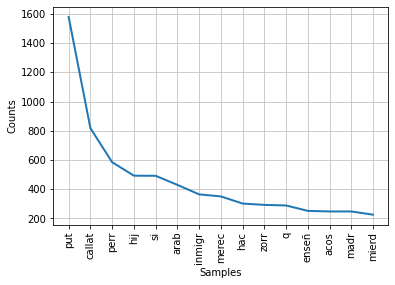

[('put', 24), ('inmigr', 16), ('perr', 13), ('arab', 12), ('muj', 11), ('si', 9), ('madr', 6), ('pued', 6), ('bien', 6), ('merec', 6), ('pas', 6), ('callat', 6), ('dej', 6), ('vall', 6), ('hij', 5)]


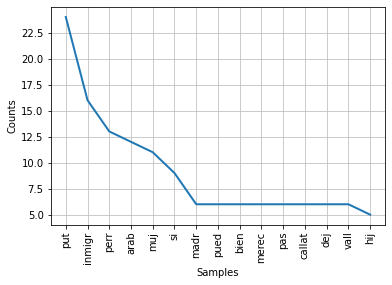

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [7]:
from nltk.probability import FreqDist
fdist_train = FreqDist(full_wordlist_train)
top_15_train = fdist_train.most_common(15)

fdist_eval = FreqDist(full_wordlist_eval)
top_15_eval = fdist_eval.most_common(15)

print(top_15_train)
fdist_train.plot(15)

print(top_15_eval)
fdist_eval.plot(15)

# Sesión 3: Obteniendo bolsa de palabras, y calculando td-df

## Enunciado

Se le pide que tome del corpus con el que vamos a trabajar en la práctica, HateEval, los 50 primero tweets. Comience a partir del resultado obtenido tras la actividad de la sesión anterior, repitiéndola para ampliar el tamaño.

1. Obtenga el bag of words para ese mini-corpus y calcule su tf·idf


## Implementación

### Paso 1: Reagrupando tokens en frases

Para obtener la bolsa de palabras y calcular el td-df, necesitamos partir de frases, no tokens
En la sesión anterior, el filtrado se realizó después de dividir en tokens, por lo que es necesario reagrupar las palabras en frases.

Nos basaremos en el corpus reducido a la raiz. El dataframe resultante se llamará `corpus_phrases`


#### Modificación de la sesión 4

Repetimos el proceso para el conjunto de evaluación. Los conjuntos resultantes pasan a llamarse `corpus_phrases_train` y `corpus_phrases_eval`

In [8]:
def phrase_group(wordlist):
    list_to_str = ' '.join([str(word) for word in wordlist])
    return list_to_str

corpus_phrases_train = corpus_root_train.copy()
corpus_phrases_train['text'] = corpus_root_train['text'].apply(phrase_group)

corpus_phrases_eval = corpus_root_eval.copy()
corpus_phrases_eval['text'] = corpus_root_eval['text'].apply(phrase_group)

print(corpus_phrases_train)
print(corpus_phrases_eval)


                                                   text  HS  TR  AG
0     easyjet quier duplic numer mujer pilot veras a...   1   0   0
1     gobiern deb cre control estrict inmigr zon fro...   1   0   0
2     veo mujer destru acos laboral callejer depresi...   0   0   0
3     respetu demas sol recuerd si escori culp clar ...   0   0   0
4     antoni caballer ser mal gust ignor vez clar mi...   0   0   0
...                                                 ...  ..  ..  ..
4464  callateee zorr ahre cnco bestboyband iheartawards   1   1   1
4465  president cucut problem venezolan disput terri...   1   0   1
4466                                callat vist dej put   0   0   0
4467                 hombr cas mujer cabr sab freg plat   1   0   0
4468         lent caracol callat hij put dic blackberry   0   0   0

[4469 rows x 4 columns]
                                                 text
0                                 oye molest put madr
1                                      ningun muj p

### Paso 2: Generando una lista de frases

En el paso anterior, realizamos la agrupación directamente sobre el dataframe, para poder mantener la relación entre el texto y el resto de datos del tuit.

Pero, para poder generar la bolsa de palabras, necesitamos utilizar una lista de frases. Para ello, utilizamos la función `to_numpy()` sobre el campo `text` del dataframe anterior.

La lista resultante la llamaremos `corpus_phrases_list`

#### Modificación de la sesión 4

Repetimos el proceso para el conjunto de evaluación. Los conjuntos resultantes pasan a llamarse `corpus_phrases_train_list` y `corpus_phrases_eval_list`

In [9]:
corpus_phrases_train_list = corpus_phrases_train['text'].to_numpy()
corpus_phrases_eval_list = corpus_phrases_eval['text'].to_numpy()

print(corpus_phrases_eval_list)
print(corpus_phrases_eval_list)

['oye molest put madr' 'ningun muj put'
 'edit ademas complic hac merezc pen pued hab grab put hosti plan si mont bien maquill atract va mierd'
 'bien jod put alegr merec pequeñ otgala9'
 'polit levant sesion hij put mand peon plaz provoc violenci 15 polic her pas si ahi puebl dios mio puebl viej romp lom labur'
 'casus callat put vez' 'culpabl perr v'
 'pued cre propi mujer naturalic violacion acos justifiqu muj provoc ment mierd put madr'
 'hij put mueret asquer merec mierd'
 'ide poll ceboll obvi van entrar desconfi entraran quier ir confianz'
 'dos amig habl raul q das muj trat hech'
 'respetu demas sol recuerd si escori culp clar se quien tom'
 'sol sab sub histori perr merezc pen'
 'erdog pues pon fot poll car manipul titul'
 'parec muj cientif cientif pas cos cabez muj pas cabez cos'
 'vien polit españ franc pas quer igual fanat independent lleg despues atonta vot cs innov'
 'hij put nuñ segun represent educ put viej chismos chupat verg'
 'culp petard amig loc encontr perrit esc

### Paso 3: Generando la bolsa de palabras

Una vez con la lista de frases, generamos la bolsa de palabras, que agrupará las palabras y obtendrá el número de ocurrencias de cada una dentro del conjunto de frases. 

Para ello, utilizaremos la clase CountVectorizer de SciKit Learn. Esta generará un diccionario relacionando cada palabra con el número de ocurrencias de la misma. A esto se le llamará "vocabulario"

#### Modificación de la sesión 4

Para generar unigramas y bigramas, añadimos a `CountVectorizer()` el parámetro `ngram_range()` indicando el tamaño mínimo y máximo de los ngramas. En este caso, dado que son unigramas y bigramas, el rango será (1,2). Además, repetimos el proceso para el conjunto de evaluación

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

# creamos la matriz
bigram_vectorizer_train = CountVectorizer(ngram_range=(1,2))
bigram_vectorizer_test = CountVectorizer(ngram_range=(1,2))

# construimos vocabulario
bigram_vectorizer_train.fit(corpus_phrases_train_list)
bigram_vectorizer_test.fit(corpus_phrases_eval_list)

print(bigram_vectorizer_train.vocabulary_)
print(bigram_vectorizer_eval.vocabulary_)

{'easyjet': 13263, 'quier': 34622, 'duplic': 13222, 'numer': 28359, 'mujer': 27185, 'pilot': 31592, 'veras': 42782, 'aparc': 2855, 'avion': 4290, 'easyjet quier': 13264, 'quier duplic': 34663, 'duplic numer': 13223, 'numer mujer': 28366, 'mujer pilot': 27245, 'pilot veras': 31594, 'veras aparc': 42783, 'aparc avion': 2856, 'gobiern': 17400, 'deb': 10828, 'cre': 9727, 'control': 9317, 'estrict': 15206, 'inmigr': 20777, 'zon': 44553, 'fronteriz': 16741, 'colombi': 8506, 'despues': 11934, '208querran': 334, 'ven': 42463, 'mas': 24694, 'gobiern deb': 17408, 'deb cre': 10847, 'cre control': 9748, 'control estrict': 9323, 'estrict inmigr': 15207, 'inmigr zon': 20986, 'zon fronteriz': 44556, 'fronteriz colombi': 16743, 'colombi despues': 8507, 'despues 208querran': 11937, '208querran ven': 335, 'ven mas': 42490, 'veo': 42662, 'destru': 12001, 'acos': 1063, 'laboral': 22353, 'callejer': 6450, 'depresion': 11592, 'violacion': 43528, 'sexual': 37639, 'maltrat': 24198, 'fisic': 16336, 'conoc': 90

NameError: name 'bigram_vectorizer_eval' is not defined

### Paso 4: Generando la matriz de documentos

Una vez generado el vocabulario de la bolsa de palabras, generamos una matriz de documentos.
Esta mostrará, por cada documento, las palabras que aparecen y las que no. Si aparece mostrará un 1, si no aparece un 0.

Para generarla, utilizaremos el método `transform()` de la clase anterior, pasándole como parámetro la lista de frases previamente obtenida. Una vez obtenida, la mostraremos por pantalla, mostrando el tamaño de la matriz, su vocabulario, y la matriz en sí.

Vemos como, en la parte de la matriz de documentos que se nos muestra, prácticamente no hay ocurrencias de las palabras del vocabulario.

#### Modificación de la sesión 4

Repetimos el proceso para el conjunto de evaluación

In [12]:
vector_train_count = bigram_vectorizer_train.transform(corpus_phrases_train_list)
#print(vector_train_count.shape)
#print(sorted(bigram_vectorizer_train.vocabulary_))
print(vector_train_count.toarray())

vector_test_count = bigram_vectorizer_test.transform(corpus_phrases_eval_list)
#print(vector_test_count.shape)
#print(sorted(bigram_vectorizer_test.vocabulary_))
#print(vector_test_count.toarray())


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### Paso 5: Calculando el tf-idf

La bolsa de palabras simplemente cuenta el número de ocurrencias de cada palabra. Pero ignora la importancia de dichas palabras dentro de la frase. El tf-idf permite obtener una ponderación de la importancia de cada palabra dentro de la frase, a partir de la frecuencia de aparición tanto en el propio documento como en el resto de documentos.

Esto permite valorar la importancia de cada palabra dentro del documento, de forma mucho mas precisa que el conteo anterior.

Para calcularlo, utilizaremos la clase `TfidfVectorizer` de SciKit Learn. Esta funciona de manera bastante similar a la anterior, partiendo de una lista de frases, obteniendo el vocabulario, y calculando la matriz con las ponderaciones de cada palabra dentro del documento.

El atributo `idf_` de dicha clase permitirá obtener una lista con el idf de cada palabra del vocabulario.

De forma similar al anterior, vemos que en la parte de la matriz que se nos muestra, la mayor parte de las palabras tienen una ponderación de 0, lo cual podría ser indicativo de que muchas palabras no tienen ocurrencias

#### Modificación de la sesion 4

Añadimos bigramas al cálculo, y repetimos el proceso con el conjunto de evaluación

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_train = TfidfVectorizer(ngram_range=(1,2))
vectorizer_train.fit(corpus_phrases_train_list)

print(vectorizer_train.vocabulary_)
print(vectorizer_train.idf_)
# codificamos como matriz de documentos, transformando
vector_train_tfidf = vectorizer_train.transform(corpus_phrases_train_list)
# mostramos
print(vector_train_tfidf.shape)
print(vector_train_tfidf.toarray())

vectorizer_eval = TfidfVectorizer(ngram_range=(1,2))
vectorizer_eval.fit(corpus_phrases_eval_list)

print(vectorizer_train.vocabulary_)
print(vectorizer_train.idf_)
# codificamos como matriz de documentos, transformando
vector_eval_tfidf = vectorizer_eval.transform(corpus_phrases_eval_list)
# mostramos
print(vector_eval_tfidf.shape)
print(vector_eval_tfidf.toarray())

{'easyjet': 13263, 'quier': 34622, 'duplic': 13222, 'numer': 28359, 'mujer': 27185, 'pilot': 31592, 'veras': 42782, 'aparc': 2855, 'avion': 4290, 'easyjet quier': 13264, 'quier duplic': 34663, 'duplic numer': 13223, 'numer mujer': 28366, 'mujer pilot': 27245, 'pilot veras': 31594, 'veras aparc': 42783, 'aparc avion': 2856, 'gobiern': 17400, 'deb': 10828, 'cre': 9727, 'control': 9317, 'estrict': 15206, 'inmigr': 20777, 'zon': 44553, 'fronteriz': 16741, 'colombi': 8506, 'despues': 11934, '208querran': 334, 'ven': 42463, 'mas': 24694, 'gobiern deb': 17408, 'deb cre': 10847, 'cre control': 9748, 'control estrict': 9323, 'estrict inmigr': 15207, 'inmigr zon': 20986, 'zon fronteriz': 44556, 'fronteriz colombi': 16743, 'colombi despues': 8507, 'despues 208querran': 11937, '208querran ven': 335, 'ven mas': 42490, 'veo': 42662, 'destru': 12001, 'acos': 1063, 'laboral': 22353, 'callejer': 6450, 'depresion': 11592, 'violacion': 43528, 'sexual': 37639, 'maltrat': 24198, 'fisic': 16336, 'conoc': 90

(4469, 44768)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{'easyjet': 13263, 'quier': 34622, 'duplic': 13222, 'numer': 28359, 'mujer': 27185, 'pilot': 31592, 'veras': 42782, 'aparc': 2855, 'avion': 4290, 'easyjet quier': 13264, 'quier duplic': 34663, 'duplic numer': 13223, 'numer mujer': 28366, 'mujer pilot': 27245, 'pilot veras': 31594, 'veras aparc': 42783, 'aparc avion': 2856, 'gobiern': 17400, 'deb': 10828, 'cre': 9727, 'control': 9317, 'estrict': 15206, 'inmigr': 20777, 'zon': 44553, 'fronteriz': 16741, 'colombi': 8506, 'despues': 11934, '208querran': 334, 'ven': 42463, 'mas': 24694, 'gobiern deb': 17408, 'deb cre': 10847, 'cre control': 9748, 'control estrict': 9323, 'estrict inmigr': 15207, 'inmigr zon': 20986, 'zon fronteriz': 44556, 'fronteriz colombi': 16743, 'colombi despues': 8507, 'despues 208querran': 11937, '208querran ven': 335, 'ven mas': 42490, 'veo': 42662,


# Sesion 4: Construyendo un sistema de análisis de sentimiento

## Enunciado

1. Añada al bag of words del ejercicio del día anterior los bi-gramas.
2. Se les han puesto a su disposición el corpus HateEval, dividido ya en la colección de entrenamiento y la de evaluación.

3. Pruebe a aplicar los 3 clasificadores que probamos en la sesión 1 (estableciendo una línea base), Random Forest, Red Neuronal y SVM.

4. ¿Con cuál obtiene mayor precisión?

## Implementación

### Paso 2: Dividiendo la colección en subconjuntos

Para evitar problemas de sobreaprendizaje, en los que el clasificador se aprende su propio conjunto de ejemplos, dividimos el conjunto de datos en dos partes: entrenamiento y test. 

Como conjunto inicial, utilizaremos el conjunto de entrenamiento preprocesado anteriormente, almacenado en `vector_train_tfidf`. 

Para dividir el conjunto, utilizaremos la función `train_test_split` de SciKit Learn. A esta le pasaremos el conjunto `vector_train_tfidf`, las etiquetas `labels_train`, y configuraremos varias opciones:

- Los datos se particionarán según sus etiquetas (opción `stratify`)
- Tamaño de los conjuntos de test: 20% del conjunto original
- Semilla para generador aleatorio: 1234

Esta función devolverá una tupla con los 4 subconjuntos generados: 2 de entrenamiento, y 2 de test. 


In [14]:
from sklearn.model_selection import train_test_split

# división del conjunto en entrenamiento y test

X_train, X_test, y_train, y_test = train_test_split(vector_train_tfidf, labels_train,

                                                    stratify=labels_train,

                                                    test_size=0.2,

                                                    random_state=1234)

#print(X_train)
print(y_train)
#print(labels)

      HS  TR  AG
2955   1   0   1
2942   1   0   0
2460   1   1   1
3824   0   0   0
612    0   0   0
...   ..  ..  ..
3905   0   0   0
1922   0   0   0
1760   0   0   0
1490   0   0   0
4377   0   0   0

[3575 rows x 3 columns]


### Paso 3: Creando el clasificador

Una vez preparados los subconjuntos de entrenamiento y test, preparamos el clasificador. Utilizaremos los mismos clasificadores de la Tarea 1:

- *RandomForestClassifier*: basado en un bosque aleatorio. A este le aplicamos los siguientes parámetros:
    
    - `criterion`: Función de medición de la calidad de una partición. Admite dos valores: 'giny' o 'entropy'.
        En este caso, elegimos este último
    
    - `n-estimators`: Número de árboles que conforman el bosque. Establecemos su valor a 100
    - `class-weight`: Peso asociado a cada etiqueta. Establecemos un valor de 0.6 para la clase 1.
    
- *SVC*: basado en una Máquina Vector de Soporte. Aplicamos los siguientes parámetros:

    - `kernel`: Tipo de kernel utilizado por el algoritmo. En nuestro caso, utilizaremos el tipo 'rbf'
    - `gamma`: Coeficiente utilizado por el kernel. Lo establecemos a 0.001
    - `C`: Parámetro de regularización. La anchura de regularización es inversamente proporcional a su valor. Lo establecemos a 300. 
    - `class_weight`: Establece el parámetro C de la clase 'i' a peso_clase[i]*c. En nuestro caso, establecemos el peso de la clase 0 a 0.7

- *MLPClassifier*: basado en una red neuronal. En este caso, dejamos todos los parámetros a sus valores por defecto.


Cargamos las clases de cada clasificador

In [16]:
from sklearn.ensemble import RandomForestClassifier

from sklearn import svm

from sklearn.neural_network import MLPClassifier


#### 3.1. Ajustando los modelos de cada clasificador

Ajustamos cada clasificador con la partición de entrenamiento obtenido de la partición anterior, y lo probamos con la partición de entrenamiento.

Para ello, utilizamos la función `fit()` que realiza el ajuste del modelo acorde al conjunto de entrenamiento (X_train) y sus etiquetas (y_train); y la función `predict()`, que utiliza el modelo ajustado para realizar una predicción sobre la partición de test (X_test).

Para probar el ajuste, utilizamos la función `score()`, pasándole la partición de test y sus etiquetas. Esta función nos realizará una ponderación del ajuste obtenido. Mostramos por pantalla el resultado.

Repetimos el proceso con cada tipo de clasificador

In [17]:
clasificador_rfc = RandomForestClassifier(criterion='entropy', n_estimators=100)
clasificador_rfc.fit(X_train, y_train)

pred_y_rfc = clasificador_rfc.predict(X_test)

print("CCR: %f"%(clasificador_rfc.score(X_test, y_test)))

CCR: 0.689038


In [ ]:
clasificador = svm.SVC(kernel='rbf', gamma='auto', C=300)
#clasificador_svc = svm.SVC() 

clasificador_svc.fit(X_train, y_train)

pred_y_svc = clasificador_svc.predict(X_test)

print("CCR: %f"%(clasificador_svc.score(X_test, y_test)))

In [18]:
clasificador_mlp = MLPClassifier()

clasificador_mlp.fit(X_train, y_train)

pred_y_mlp = clasificador_mlp.predict(X_test)

print("CCR: %f"%(clasificador_mlp.score(X_test, y_test)))

CCR: 0.568233


### Paso 4: Observando los resultados

Una vez realizado el procesamiento sobre los datos de entrenamiento, observamos los resultados

#### Generando el reporte de clasificación

Generamos un reporte de clasificación con varias métricas conocidas: precisión, cobertura, medida-f...

In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_y_rfc))
print(classification_report(y_test, pred_y_mlp))

              precision    recall  f1-score   support

           0       0.80      0.50      0.62       368
           1       0.82      0.50      0.62       223
           2       0.78      0.41      0.53       297

   micro avg       0.80      0.47      0.59       888
   macro avg       0.80      0.47      0.59       888
weighted avg       0.80      0.47      0.59       888
 samples avg       0.20      0.18      0.19       888

              precision    recall  f1-score   support

           0       0.63      0.76      0.69       368
           1       0.77      0.46      0.58       223
           2       0.68      0.55      0.60       297

   micro avg       0.67      0.61      0.64       888
   macro avg       0.70      0.59      0.63       888
weighted avg       0.68      0.61      0.63       888
 samples avg       0.31      0.25      0.26       888



/home/almu/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/almu/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/almu/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/almu/.local/lib/python3.9/site-packages/sklearn/

### Paso 5: Probando el clasificador con datos reales

Una vez realizado el procesamiento sobre los datos de entrenamiento, probamos a ejecutarlo con el conjunto de evaluación

Ejecutamos el clasificador y mostramos todas las métricas de evaluación. Repetimos el proceso con cada clasificador

In [21]:
evalConTfidf = bigram_vectorizer_train.transform(corpus_phrases_eval['text'])

print(evalConTfidf.shape)

(100, 44768)


In [22]:
evalPredict_rfc = clasificador_rfc.predict(evalConTfidf)

print("CCR: %f"%(clasificador_rfc.score(evalConTfidf, labels_eval)))
print(classification_report(labels_eval, evalPredict_rfc))
print(evalPredict_rfc)

CCR: 0.630000
              precision    recall  f1-score   support

           0       0.78      0.70      0.74        50
           1       0.58      0.82      0.68        17
           2       0.63      0.61      0.62        28

   micro avg       0.69      0.69      0.69        95
   macro avg       0.66      0.71      0.68        95
weighted avg       0.70      0.69      0.69        95
 samples avg       0.32      0.33      0.32        95

[[0 0 0]
 [1 0 1]
 [0 0 0]
 [1 1 1]
 [0 0 0]
 [0 0 0]
 [1 1 1]
 [0 0 0]
 [1 1 1]
 [0 0 0]
 [1 1 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [1 0 0]
 [0 0 0]
 [1 1 1]
 [0 0 0]
 [1 1 1]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [1 1 1]
 [0 0 0]
 [1 1 1]
 [0 0 0]
 [0 0 0]
 [1 1 1]
 [1 0 0]
 [0 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 0]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 0 0]
 [1 0 0]
 [1 1 1]
 [1 0 0]
 [0 0 0]
 [0 0 0]
 [1 0 1]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [1 0 0]
 [1 0 0]
 [0 0 0]
 [0 0 0]
 [

/home/almu/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/almu/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
evalPredict_mlp = clasificador_mlp.predict(evalConTfidf)

print("CCR: %f"%(clasificador_mlp.score(evalConTfidf, labels_eval)))
print(classification_report(labels_eval, evalPredict_mlp))
print(evalPredict_mlp)

CCR: 0.650000
              precision    recall  f1-score   support

           0       0.81      0.70      0.75        50
           1       0.65      0.76      0.70        17
           2       0.75      0.54      0.63        28

   micro avg       0.76      0.66      0.71        95
   macro avg       0.74      0.67      0.69        95
weighted avg       0.77      0.66      0.71        95
 samples avg       0.33      0.31      0.31        95

[[0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [1 1 1]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [1 1 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [1 0 0]
 [0 0 0]
 [1 1 1]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [1 1 1]
 [0 0 0]
 [1 1 1]
 [0 0 0]
 [0 0 0]
 [1 1 1]
 [1 0 0]
 [0 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [0 0 0]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [0 1 0]
 [1 1 0]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 0 1]
 [1 0 0]
 [1 0 1]
 [1 0 0]
 [0 0 0]
 [0 0 0]
 [1 1 1]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [1 0 0]
 [1 0 0]
 [0 0 0]
 [1 0 0]
 [

/home/almu/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/almu/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Resumen final

En esta tarea, hemos ampliado el preprocesamiento al conjunto de evaluación, generadas bolsas de palabras para ambos conjuntos, y añadido bigramas a dichas bolsas de palabras.

También hemos aplicado la función TfIdf para obtener la ponderación de cada palabra dentro del conjunto, en función de su importancia en el mismo. A diferencia de la tarea anterior, esta vez hemos mantenido la reducción a la raíz de los términos de cada documento.

Tras esto, hemos aplicado el clasificador y analizado sus resultados. Para ello, hemos dividido el conjunto de entrenamiento en varias particiones de entrenamiento y test, y utilizado estas particiones para ajustar el modelo de clasificación.


Una vez ajustados los modelos de clasificación, los hemos aplicado sobre el conjunto de evaluación, el cual siguió el mismo preprocesamiento que el de entrenamiento, y analizado los resultados de cada modelo.

### Aclaraciones

A diferencia de la Tarea 1, en esta tarea hemos aplicado todas las etiquetas del conjunto, lo cual ha variado ligeramente el funcionamiento. Para evitar problemas en los ajustes,  hemos desactivado los parámetros del peso de la clase en cada clasificador, que requerirían una adaptación a cada clase, algo difícil de calcular.


## Conclusiones


Tras probar cada modelo de clasificación, encontramos que el modelo MLP mejora ligeramente los resultados sobre el RandomForestClassifier. Aunque en el ajuste inicial obtiene peor CCR (0.56 vs 0.68 del RFC), en las pruebas sobre el conjunto de evaluación estos resultados mejoran ligeramente, con un 0.64 del RFC y un 0.65 del MLP.

Las precisiones de cada clase también aumentan al probar los clasificadores sobre el conjunto de evaluación.

El clasificador SVC no se ha podido probar, debido a que daba errores al ejecutarse en conjuntos con múltiples etiquetas. A su vez, la matriz de confusión no se ha podido generar, por el mismo motivo
